# In this notebook, we show a regression example using the employee dataset. In this problem, the target variable is "salary_growth" that represents the amount of increase in an employee's salary. The explanatory variables include age, edu, jobtime, prevexp, minority, gender, and jobcat. Definition of these explanatory variables is presented in 


In [2]:
import pandas as pd
import numpy as np
import warnings
import scipy
import matplotlib.pyplot as plt
from safeaipackage import check_accuracy, check_robustness, check_explainability, check_fairness, check_privacy
from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 10000)

In [3]:
data = pd.read_excel("D:/files/research_activities/ORGANIZED_FILES/safeaipackage/examples/employee.xlsx")
print("This dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head()

This dataset has 473 rows and 9 columns


,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat
0,57000,36,15,27000,98,144,no_min,m,manager
1,40200,30,16,18750,98,36,no_min,m,Clerical
2,21450,59,12,12000,98,381,no_min,f,Clerical
3,21900,41,8,13200,98,190,no_min,f,Clerical
4,45000,33,15,21000,98,138,no_min,m,Clerical


In [4]:
data["gender"] = np.where(data["gender"]=="m", 0, 1)
data["minority"] = np.where(data["minority"]=="no_min", 0, 1)
data = pd.get_dummies(data, columns=["jobcat"])
data.head()

,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager
0,57000,36,15,27000,98,144,0,0,0,0,1
1,40200,30,16,18750,98,36,0,0,1,0,0
2,21450,59,12,12000,98,381,0,1,1,0,0
3,21900,41,8,13200,98,190,0,1,1,0,0
4,45000,33,15,21000,98,138,0,0,1,0,0


In [5]:
data["salary_growth"] = data["salary"]-data["startsal"]

data.drop(["salary", "startsal"], axis=1, inplace=True)
data.head()

,age,edu,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager,salary_growth
0,36,15,98,144,0,0,0,0,1,30000
1,30,16,98,36,0,0,1,0,0,21450
2,59,12,98,381,0,1,1,0,0,9450
3,41,8,98,190,0,1,1,0,0,8700
4,33,15,98,138,0,0,1,0,0,24000


In [6]:
data.describe()

,age,edu,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager,salary_growth
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,31.672304,13.486258,81.141649,95.947146,0.219873,0.456660,0.765328,0.057082,0.177590,17409.196617
std,11.784093,2.885587,10.047505,104.680038,0.414599,0.498645,0.424243,0.232246,0.382572,10825.353367
min,17.000000,8.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5550.000000
25%,23.000000,12.000000,72.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10650.000000
50%,26.000000,12.000000,81.000000,55.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14250.000000
75%,40.000000,15.000000,90.000000,139.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20020.000000
max,59.000000,21.000000,98.000000,476.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76240.000000


In [7]:
X = data.drop(["salary_growth"], axis=1)
y = data["salary_growth"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(xtrain.shape)

(331, 9)


In [8]:
#ann_full = MLPRegressor(random_state=1).fit(xtrain, ytrain)
rf_regressor = RandomForestRegressor(random_state=1).fit(xtrain, ytrain)
yhat = rf_regressor.predict(xtest)
yhat

array([13185.        , 18366.        , 39110.95      , 30780.15      ,
       14056.5       , 16368.        , 23531.95      , 13927.8       ,
       14695.2       , 22291.75      , 14350.8       , 18466.        ,
       45209.4       , 16104.        , 14734.5       , 16983.        ,
       16494.        , 14669.1       , 10738.85178571, 16692.6       ,
       14919.        , 19221.        , 24371.9       , 18378.9       ,
       24007.55      ,  8646.        , 43454.1       , 26784.15      ,
       31222.05      , 44060.1       , 16287.        , 17549.1       ,
       16040.        ,  9212.7       , 44847.45      , 17719.5       ,
        8272.5       , 11083.5       , 41678.05      , 21092.        ,
       42934.75      , 34962.75      , 13604.1       , 18536.05      ,
       34826.2       , 13237.5       , 15036.        , 13398.        ,
       35007.55      , 17022.5       , 23481.15      , 21700.9       ,
       14607.        , 14824.05      , 17616.        ,  9653.4       ,
      

# ACCURACY

## To check accuracy of the classification model, we can use the rga function defined in the "check_accuracy" module of "safeaipackage" python package

In [8]:
#ACCURACY
#rga = check_accuracy.rga(ytest, yhat)
#rga

In [11]:
def rga(y, yhat):
    """
     ### RANK GRADUATION ACCURACY (RGA) MEASURE ###
     Function for the RGE measure computation
     Inputs: y -> observed target variable values; 
             yhat -> predictions generated by the applied selected model
    """ 
    y = pd.DataFrame(y).reset_index(drop=True)
    yhat = pd.DataFrame(yhat).reset_index(drop=True)
    df = pd.concat([y,yhat], axis=1)
    df.columns = ["y", "yhat"]
    ryhat = yhat.rank(method="min")
    df["ryhat"] = ryhat
    support = df.groupby('ryhat')['y'].mean().reset_index(name='support')
    rord = list(range(len(y)))
    for jj in range(len(rord)):
        for ii in range(len(support)):
                if df["ryhat"][jj]== support['ryhat'][ii]:
                    rord[jj] = support['support'][ii]
    vals = [[i, values] for i, values in enumerate(df["yhat"])]
    ranks = [x[0] for x in sorted(vals, key= lambda item: item[1])]
    ystar = [rord[i] for i in ranks]
    I = list(range(len(y)))
    conc = 2*sum([I[i]*ystar[i] for i in range(len(I))])
    dec= 2*sum([sorted(df["y"], reverse=True)[i]*I[i] for i in range(len(I))]) 
    inc = 2*sum([sorted(df["y"])[i]*I[i] for i in range(len(I))]) 
    RGA=(conc-dec)/(inc-dec)
    return RGA 

In [11]:
rga(ytest, yhat)

0.9149516963330642

#### The higher RGA value (closer to one) the better concordance between the trained model and the actual values

## "check_accuracy" module includes the rga_statistic_test function that is an RGA based test for comparing the predictive accuracy of a reduced model with that of a more complex model

In [11]:
#rga_pvalues = []
#for i in xtrain.columns:
#    xtrain_rm = xtrain.drop(i, axis=1)
#    xtest_rm = xtest.drop(i, axis=1)
#    model_rm = rf_model_full.fit(xtrain_rm, ytrain)
#    yhat_rm = model_rm.predict(xtest_rm)
#    rga_pvalues.append(check_accuracy.rga_statistic_test(ytest, yhat_rm, yhat))
#print(pd.DataFrame(rga_pvalues, index=xtest.columns, columns=["P_value"]))

In [12]:
def _delta_function(data, func):
        result = (func(data.iloc[:,0], data.iloc[:,2]))-(func(data.iloc[:,0], data.iloc[:,1]))
        return result

In [13]:
def rga_statistic_test(y, yhat_rm, yhat_cm):
        """
        RGA based test for comparing the predictive accuracy of a reduced model with that of a more complex model
        """
        y = pd.DataFrame(y).reset_index(drop=True)
        yhat_rm = pd.DataFrame(yhat_rm).reset_index(drop=True)
        yhat_cm = pd.DataFrame(yhat_cm).reset_index(drop=True)
        jk_mat = pd.concat([y,yhat_rm, yhat_cm], axis=1)
        jk_mat.columns = ["y", "yhat_rm", "yhat_cm"]
        n = len(jk_mat)
        index = np.arange(n)
        jk_results = []
        for i in range(n):
            jk_sample = jk_mat.drop(labels= i)
            jk_sample.reset_index(drop=True, inplace=True)
            jk_statistic = _delta_function(jk_sample, rga)
            jk_results.append(jk_statistic)
        se = np.sqrt(((n-1)/n)*(sum([(x-np.mean(jk_results))**2 for x in jk_results])))
        z = (rga(y,yhat_cm)-rga(y,yhat_rm))/se
        p_value = 2*scipy.stats.norm.cdf(-abs(z))
        return p_value

In [14]:
xtrain_rm = xtrain.drop("minority", axis=1)
xtest_rm = xtest.drop("minority", axis=1)
model_rm = RandomForestRegressor(random_state=1).fit(xtrain_rm, ytrain)
yhat_rm = model_rm.predict(xtest_rm)
rga_statistic_test(ytest, yhat_rm, yhat)

0.03637343872427377

In [17]:
rga_pvalues = []
for i in xtrain.columns:
    xtrain_rm = xtrain.drop(i, axis=1)
    xtest_rm = xtest.drop(i, axis=1)
    model_rm = RandomForestRegressor(random_state=1).fit(xtrain_rm, ytrain)
    yhat_rm = model_rm.predict(xtest_rm)
    rga_pvalues.append(rga_statistic_test(ytest, yhat_rm, yhat))
print(pd.DataFrame(rga_pvalues, index=xtest.columns, columns=["P_value"]))

KeyboardInterrupt: 

# EXPLAINABILITY

# To find the contribution of explanatory variables to the output of the model, we can use the rge function defined in the "check_explainability" module of "safeaipackage" python package

In [16]:
#check_explainability.rge(xtrain, xtest, ytrain, ytest, rf_model_full)

In [28]:
def rge(xtrain, xtest, ytrain, ytest, model):
    """
     ### RANK GRADUATION EXPLAINABILITY (RGE) MEASURE ###
     Function for the RGE measure computation
     Inputs: xtrain, xtest, ytrain, ytest -> the train and test data selected for training and testing the model; 
             model -> a classification or regression model. For example RandomForestClassifier() in ensemble module of sklearn.
    """    
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    rge_list = []
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    for i in xtrain.columns:
         xtrain_rm = xtrain.drop(i, axis=1)
         xtest_rm = xtest.drop(i, axis=1)
         model_rm = model.fit(xtrain_rm, ytrain)
         yhat_rm = model_rm.predict(xtest_rm)
         rge_list.append(1-(rga(yhat, yhat_rm)))
    rge_df = pd.DataFrame(rge_list, index=xtest.columns, columns=["RGE"]).sort_values(by="RGE", ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(rge_df.index, rge_df["RGE"])
    plt.xlabel("RGE (Feature Importance)")
    plt.ylabel("Feature")
    plt.title("RGE")
    plt.show()
    return rge_df

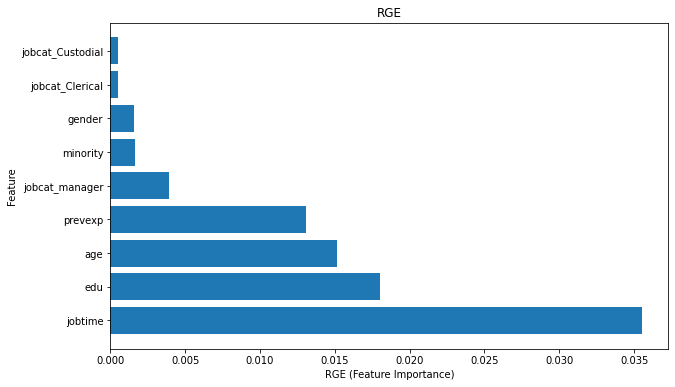

                       RGE
jobtime           0.035521
edu               0.018036
age               0.015171
prevexp           0.013059
jobcat_manager    0.003906
minority          0.001639
gender            0.001571
jobcat_Clerical   0.000494
jobcat_Custodial  0.000481


In [30]:
print(rge(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1)))

# RGE test

In [44]:
xtrain_jobtime = xtrain.drop("jobtime", axis=1)
xtest_jobtime = xtest.drop("jobtime", axis=1)

rf_model_jobtime = RandomForestRegressor(random_state=1).fit(xtrain_jobtime, ytrain)
yhat_jobtime = rf_model_jobtime.predict(xtest_jobtime)

In [33]:
def rge_num(yhat, yhat_xk):
    yhat = pd.DataFrame(yhat).reset_index(drop=True)
    yhat_xk = pd.DataFrame(yhat_xk).reset_index(drop=True)
    df = pd.concat([yhat,yhat_xk], axis=1)
    df.columns = ["yhat", "yhat_xk"]
    ryhat_xk = yhat_xk.rank(method="min")
    df["ryhat_xk"] = ryhat_xk
    support = df.groupby('ryhat_xk')['yhat'].mean().reset_index(name='support')
    rord = list(range(len(yhat)))
    for jj in range(len(rord)):
        for ii in range(len(support)):
                if df["ryhat_xk"][jj]== support['ryhat_xk'][ii]:
                    rord[jj] = support['support'][ii]
    vals = [[i, values] for i, values in enumerate(df["yhat_xk"])]
    ranks = [x[0] for x in sorted(vals, key= lambda item: item[1])]
    ystar = [rord[i] for i in ranks]
    I = list(range(len(yhat)))
    conc = 2*sum([I[i]*ystar[i] for i in range(len(I))])
    dec= 2*sum([sorted(df["yhat"], reverse=True)[i]*I[i] for i in range(len(I))]) 
    inc = 2*sum([sorted(df["yhat"])[i]*I[i] for i in range(len(I))]) 
    RGE_num=(conc-dec)
    return RGE_num 

In [34]:
def rge_den(yhat):
    yhat = pd.DataFrame(yhat)
    yhat.columns = ["yhat"]
    I = list(range(len(yhat)))
    dec= 2*sum([yhat.sort_values(by="yhat", ascending=False, ignore_index=True).iloc[i,0]*I[i] for i in range(len(I))]) 
    inc = 2*sum([yhat.sort_values(by="yhat", ignore_index=True).iloc[i,0]*I[i] for i in range(len(I))]) 
    RGE_den=(inc-dec)
    return RGE_den

In [35]:
def delta_function(data):
    return rge_den(data.iloc[:,0])-rge_num(data.iloc[:,0], data.iloc[:,1])

In [36]:
def rge_statistic_test(yhat, yhat_xk):
        yhat = pd.DataFrame(yhat).reset_index(drop=True)
        yhat_xk = pd.DataFrame(yhat_xk).reset_index(drop=True)
        jk_mat = pd.concat([yhat, yhat_xk], axis=1, keys=["yhat", "yhat_xk"])
        n = len(jk_mat)
        index = np.arange(n)
        jk_results = []
        for i in range(n):
            jk_sample = jk_mat.iloc[[x for x in index if x != i],:]
            jk_sample.reset_index(drop=True, inplace=True)
            jk_statistic = delta_function(jk_sample)
            jk_results.append(jk_statistic)
        se = np.sqrt(((n-1)/n)*(sum([(x-np.mean(jk_results))**2 for x in jk_results])))
        z = (rge_den(yhat)-rge_num(yhat,yhat_xk))/se
        p_value = 2*scipy.stats.norm.cdf(-abs(z))
        return p_value

In [45]:
rge_statistic_test(yhat, yhat_jobtime)

1.708275976442496e-08

# ROBUSTNESS

In [53]:
#check_robustness.rgr(xtrain, xtest, ytrain, ytest, rf_model_full)

In [20]:
def rgr(xtrain, xtest, ytrain, ytest, model):    
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    rgr_vals = []
    for i in range(xtrain.shape[1]):
        perturbed_xtrain = xtrain.reset_index(drop=True)
        variable_perturbed = perturbed_xtrain.iloc[:,i]
        sorted_data = np.sort(variable_perturbed)
        percentile_5_index = int(np.ceil(0.15 * len(sorted_data)))
        percentile_95_index = int(np.ceil(0.85 * len(sorted_data)))
        values_before_5th_percentile = sorted_data[:percentile_5_index]
        values_after_95th_percentile = sorted_data[percentile_95_index:]
        vals = [[i, values] for i, values in enumerate(variable_perturbed)]
        indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
        lower_tail = indices[0:10]
        upper_tail = (indices[-10:])
        upper_tail = upper_tail[::-1]
        perturbed_variable = variable_perturbed.copy()
        for j in range(10):
            perturbed_variable[lower_tail[j]] = variable_perturbed[upper_tail[j]]
            perturbed_variable[upper_tail[j]] = variable_perturbed[lower_tail[j]]
        perturbed_xtrain.iloc[:,i] = perturbed_variable
        rf_perturbed = model.fit(perturbed_xtrain, ytrain)
        yhat_pert = rf_perturbed.predict(xtest)
        rgr_vals.append(rga(yhat, yhat_pert))
    rgr_df = pd.DataFrame(rgr_vals, index=xtest.columns, columns=["RGR"]).sort_values(by="RGR", ascending=False)
    return rgr_df

In [21]:
rgr(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1))

,RGR
jobcat_Custodial,0.999480
minority,0.999419
jobcat_Clerical,0.999236
gender,0.998755
prevexp,0.998521
edu,0.998503
jobtime,0.997592
jobcat_manager,0.996210
age,0.993104


## RGR test

In [27]:
### to need the rgr test, I need to have another model results

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression().fit(xtrain,ytrain)
reg_predictions_full = regression_model.predict(xtest)

In [33]:
def rgr_statistic_test(yhat_mod1,yhat_mod2,yhat_pert_mod1,yhat_pert_mod2):
        yhat_mod1 = pd.DataFrame(yhat_mod1).reset_index(drop=True)
        yhat_mod2 = pd.DataFrame(yhat_mod2).reset_index(drop=True)
        yhat_pert_mod1 = pd.DataFrame(yhat_pert_mod1).reset_index(drop=True)
        yhat_pert_mod2 = pd.DataFrame(yhat_pert_mod2).reset_index(drop=True)
        jk_mat = pd.concat([yhat_mod1,yhat_mod2,yhat_pert_mod1,yhat_pert_mod2], axis=1, keys=["yhat_mod1", 
                                                                                        "yhat_mode2", 
                                                                                        "yhat_pert_mode1",
                                                                                        "yhat_pert_mode2"])
        n = len(jk_mat)
        index = np.arange(n)
        jk_results = []
        for i in range(n):
            jk_sample = jk_mat.iloc[[x for x in index if x != i],:]
            jk_sample.reset_index(drop=True, inplace=True)
            jk_statistic = _delta_function(jk_sample, rga)
            jk_results.append(jk_statistic)
        se = np.sqrt(((n-1)/n)*(sum([(x-np.mean(jk_results))**2 for x in jk_results])))
        z = (rga(yhat_mod1, yhat_pert_mod1)- rga(yhat_mod2, yhat_pert_mod2))/se
        p_value = 2*scipy.stats.norm.cdf(-abs(z))
        return p_value

In [59]:
#xtrain_pert = xtrain.copy()
#rgr_pvalues = []
#for i in xtrain.columns:
#    xtrain_pert[i] = np.random.permutation(xtrain[i])
#    rf_perturbed = RandomForestClassifier(random_state=1).fit(xtrain_pert, ytrain)
#    lr_perturbed = LogisticRegression(random_state=1).fit(xtrain_pert, ytrain)
#    rf_yhat_pert = rf_perturbed.predict(xtest)
#    lr_yhat_pert = lr_perturbed.predict(xtest)
#    rgr_pvalues.append(check_robustness.rgr_statistic_test(rf_predictions_full,lr_predictions_full,rf_yhat_pert,lr_yhat_pert))
#print(pd.DataFrame(rgr_pvalues, index=xtrain.columns, columns=["P_value"]))

In [34]:
xtrain_pert = xtrain.copy()
rgr_pvalues = []
for i in xtrain.columns:
    xtrain_pert[i] = np.random.permutation(xtrain[i])
    rf_perturbed = MLPRegressor(random_state=1).fit(xtrain_pert, ytrain)
    lr_perturbed = LinearRegression().fit(xtrain_pert, ytrain)
    rf_yhat_pert = rf_perturbed.predict(xtest)
    lr_yhat_pert = lr_perturbed.predict(xtest)
    rgr_pvalues.append(rgr_statistic_test(yhat,reg_predictions_full,rf_yhat_pert,lr_yhat_pert))
print(pd.DataFrame(rgr_pvalues, index=xtrain.columns, columns=["P_value"]))

                   P_value
age               0.958229
edu               0.912153
jobtime           0.882948
prevexp           0.543995
minority          0.511310
gender            0.652918
jobcat_Clerical   0.614195
jobcat_Custodial  0.548769
jobcat_manager    0.327785


# FAIRNESS

In [27]:
#print(check_fairness.rgf(xtrain, xtest, ytrain, ytest, ["gender", "minority"], rf_model_full))

In [38]:
def rgf(xtrain, xtest, ytrain, ytest, protectedvariables, model):
    """
     ### RANK GRADUATION FAIRNESS (RGF) MEASURE ###
     Function for the RGF measure computation
     Inputs: xtrain, xtest, ytrain, ytest -> the train and test data selected for training and testing the model;
             protectedvariables -> a list of variables should be considered as the protected variables; 
             model -> a classification or regression model. For example RandomForestClassifier() in ensemble module of sklearn.
    """    
    if not isinstance(protectedvariables, list):
        raise ValueError("Protectedvariables input must be a list")
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    for i in range(len(list(protectedvariables))):
        if protectedvariables[i] not in xtrain:
            raise ValueError(f"{protectedvariables[i]} is not in the variables")
    rgf_list = []
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    for i in protectedvariables:
         xtrain_pr = xtrain.drop(i, axis=1)
         xtest_pr = xtest.drop(i, axis=1)
         model_pr = model.fit(xtrain_pr, ytrain)
         yhat_pr = model_pr.predict(xtest_pr)
         rgf_list.append(rga(yhat, yhat_pr))
    return pd.DataFrame(rgf_list, index=protectedvariables, columns=["RGF"]).sort_values(by="RGF", ascending=False)


In [40]:
print(rgf(xtrain, xtest, ytrain, ytest,["gender"], RandomForestRegressor(random_state=1)))

             RGF
gender  0.998429


# RGF test

In [43]:
xtrain_gender = xtrain.drop("gender", axis=1)
xtest_gender = xtest.drop("gender", axis=1)

rf_model_gender = RandomForestRegressor(random_state=1).fit(xtrain_gender, ytrain)
yhat_gender = rf_model_gender.predict(xtest_gender)

In [46]:
rge_statistic_test(yhat, yhat_gender)

0.003146313784039523

# PRIVACY

In [33]:
#print(check_privacy.rgp(xtrain, xtest, ytrain, ytest, rf_model_full))

In [47]:
def rgp(xtrain, xtest, ytrain, ytest, index, model):
    """
     ### RANK GRADUATION PRIVACY (RGP) MEASURE ###
     Function for the RGP measure computation
     Inputs: xtrain, xtest, ytrain, ytest -> the train and test data selected for training and testing the model;
             index -> a list of indices to specify for which observations, privacy should be checked; 
             model -> a classification or regression model. For example RandomForestClassifier() in ensemble module of sklearn.
    """   
    if not isinstance(index, list):
        raise ValueError("Index input must be a list")
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    rgp_list = []
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    for i in index:
        if i in xtrain.index:
            xtrain_rm = xtrain.drop(index=i, axis=0)
            ytrain_rm = ytrain.drop(index=i, axis=0)
            model_rm = model.fit(xtrain_rm, ytrain_rm)
            yhat_rm = model_rm.predict(xtest)
            rgp_list.append((1-rga(yhat, yhat_rm)))
        else:
            raise ValueError(f"index {i} is not available")
    return pd.DataFrame(rgp_list, index=index, columns=["RGP"])

In [48]:
rgp(xtrain, xtest, ytrain, ytest, [10,12], RandomForestRegressor(random_state=1))

,RGP
10,0.004057
12,0.003356


In [ ]:
rge_statistic_test()

# ###########

In [33]:
def rgr(xtrain, xtest, ytrain, ytest, model, perturbation_percentage= 0.05):    
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    rgr_vals = []
    for i in range(xtrain.shape[1]):
        perturbed_xtrain = xtrain.reset_index(drop=True)
        variable_perturbed = perturbed_xtrain.iloc[:,i]
        sorted_data = np.sort(variable_perturbed)
        percentile_5_index = int(np.ceil(perturbation_percentage * len(sorted_data)))
        percentile_95_index = int(np.ceil(1-perturbation_percentage * len(sorted_data)))
        values_before_5th_percentile = sorted_data[:percentile_5_index]
        values_after_95th_percentile = sorted_data[percentile_95_index:]
        vals = [[i, values] for i, values in enumerate(variable_perturbed)]
        indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
        lower_tail = indices[0:percentile_5_index]
        upper_tail = (indices[-percentile_5_index:])
        upper_tail = upper_tail[::-1]
        for j in range(len(lower_tail)):
            variable_perturbed[lower_tail[j]] = variable_perturbed[upper_tail[j]]
            variable_perturbed[upper_tail[j]] = variable_perturbed[lower_tail[j]]
        perturbed_xtrain.iloc[:,i] = variable_perturbed
        rf_perturbed = model.fit(perturbed_xtrain, ytrain)
        yhat_pert = rf_perturbed.predict(xtest)
        rgr_vals.append(rga(yhat, yhat_pert))
    rgr_df = pd.DataFrame(rgr_vals, index=xtest.columns, columns=["RGR"]).sort_values(by="RGR", ascending=False)
    return rgr_df

In [38]:
rgr(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1), perturbation_percentage=0.5)

,RGR
jobcat_Clerical,0.999751
jobcat_Custodial,0.999429
gender,0.997823
minority,0.997316
jobcat_manager,0.994855
edu,0.984043
prevexp,0.981074
age,0.963267
jobtime,0.939061


In [27]:
rgr(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1))

,RGR
jobcat_Custodial,0.999429
jobcat_Clerical,0.999333
minority,0.998962
gender,0.998886
edu,0.996983
prevexp,0.996871
jobcat_manager,0.994478
jobtime,0.993367
age,0.979309


In [31]:
def rgr_all_perturbed(xtrain, xtest, ytrain, ytest, model, perturbation_percentage= 0.05):
    if perturbation_percentage > 0.5 or perturbation_percentage < 0:
        raise ValueError("The perturbation percentage should be between 0 and 0.5.")
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    rgr_vals = []
    perturbed_xtrain = xtrain.reset_index(drop=True)
    for i in range(xtrain.shape[1]):
        variable_perturbed = perturbed_xtrain.iloc[:,i]
        sorted_data = np.sort(variable_perturbed)
        percentile_5_index = int(np.ceil(perturbation_percentage * len(sorted_data)))
        percentile_95_index = int(np.ceil(1-perturbation_percentage * len(sorted_data)))
        values_before_5th_percentile = sorted_data[:percentile_5_index]
        values_after_95th_percentile = sorted_data[percentile_95_index:]
        vals = [[i, values] for i, values in enumerate(variable_perturbed)]
        indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
        lower_tail = indices[0:percentile_5_index]
        upper_tail = (indices[-percentile_5_index:])
        upper_tail = upper_tail[::-1]
        for j in range(len(lower_tail)):
            variable_perturbed[lower_tail[j]] = variable_perturbed[upper_tail[j]]
            variable_perturbed[upper_tail[j]] = variable_perturbed[lower_tail[j]]
        perturbed_xtrain.iloc[:,i] = variable_perturbed
    rf_perturbed = model.fit(perturbed_xtrain, ytrain)
    yhat_pert = rf_perturbed.predict(xtest)
    rgr_ = rga(yhat, yhat_pert)
    return rgr_

In [27]:
rgr_all_perturbed(xtrain, xtest, ytrain, ytest, MLPRegressor(random_state=1), perturbation_percentage= 0.05)


0.999999875642668

In [39]:
rgr_all_perturbed(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1), perturbation_percentage= 0.5)

0.8798594020452924

In [47]:
def rgr_negative(xtrain, xtest, ytrain, ytest, model):
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    rgr_ = []
    for i in range(xtrain.shape[1]):
        reverse_xtrain = xtrain.reset_index(drop=True)
        variable = reverse_xtrain.iloc[:,i]
        reverse_xtrain.iloc[:,i] = -1*variable
        rf_negative = model.fit(reverse_xtrain, ytrain)
        yhat_rev = rf_negative.predict(xtest)
        rgr_.append(rga(yhat, yhat_rev))
    rgr_df = pd.DataFrame(rgr_, index=xtest.columns, columns=["RGR"]).sort_values(by="RGR", ascending=False)
    return rgr_df

In [48]:
rgr_negative(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1))

,RGR
minority,0.999351
gender,0.999227
jobcat_Custodial,0.995778
jobcat_Clerical,0.992737
prevexp,0.973936
jobtime,0.959693
edu,0.958863
age,0.958301
jobcat_manager,0.925378


In [43]:
def rgr_negative_all(xtrain, xtest, ytrain, ytest, model):
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    reverse_xtrain = xtrain * -1
    rf_negative = model.fit(reverse_xtrain, ytrain)
    yhat_rev = rf_negative.predict(xtest)
    rgr_ = rga(yhat, yhat_rev)
    return rgr_

In [44]:
rgr_negative_all(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1))

0.5000000000000008

In [15]:
def rgr_single(xtrain, xtest, ytrain, ytest, model, variable, perturbation_percentage= 0.05):
    if variable not in xtrain.columns:
        raise ValueError("The selected variable is not available.")
    if perturbation_percentage > 0.5 or perturbation_percentage < 0:
        raise ValueError("The perturbation percentage should be between 0 and 0.5.")
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    rgr_vals = []
    perturbed_xtrain = xtrain.reset_index(drop=True)
    variable_perturbed = perturbed_xtrain.loc[:,variable]
    sorted_data = np.sort(variable_perturbed)
    percentile_5_index = int(np.ceil(perturbation_percentage * len(sorted_data)))
    percentile_95_index = int(np.ceil(1-perturbation_percentage * len(sorted_data)))
    values_before_5th_percentile = sorted_data[:percentile_5_index]
    values_after_95th_percentile = sorted_data[percentile_95_index:]
    vals = [[i, values] for i, values in enumerate(variable_perturbed)]
    indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
    lower_tail = indices[0:percentile_5_index]
    upper_tail = (indices[-percentile_5_index:])
    upper_tail = upper_tail[::-1]
    for j in range(len(lower_tail)):
        variable_perturbed[lower_tail[j]] = variable_perturbed[upper_tail[j]]
        variable_perturbed[upper_tail[j]] = variable_perturbed[lower_tail[j]]
    perturbed_xtrain.loc[:,variable] = variable_perturbed
    rf_perturbed = model.fit(perturbed_xtrain, ytrain)
    yhat_pert = rf_perturbed.predict(xtest)
    rgr_val = rga(yhat, yhat_pert)
    return rgr_val

In [17]:
rgr_single(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1), "prevexp", perturbation_percentage= 0.25)

0.9689853253443086

In [18]:
def rgr_all(xtrain, xtest, ytrain, ytest, model, perturbation_percentage= 0.05):
    if perturbation_percentage > 0.5 or perturbation_percentage < 0:
        raise ValueError("The perturbation percentage should be between 0 and 0.5.")
    xtrain = pd.DataFrame(xtrain).reset_index(drop=True)
    xtest = pd.DataFrame(xtest).reset_index(drop=True)
    ytrain = pd.DataFrame(ytrain).reset_index(drop=True)
    ytest = pd.DataFrame(ytest).reset_index(drop=True)
    model_full = model.fit(xtrain, ytrain)
    yhat = model_full.predict(xtest)
    rgr_vals = []
    perturbed_xtrain = xtrain.reset_index(drop=True)
    for i in range(xtrain.shape[1]):
        variable_perturbed = perturbed_xtrain.iloc[:,i]
        sorted_data = np.sort(variable_perturbed)
        percentile_5_index = int(np.ceil(perturbation_percentage * len(sorted_data)))
        percentile_95_index = int(np.ceil(1-perturbation_percentage * len(sorted_data)))
        values_before_5th_percentile = sorted_data[:percentile_5_index]
        values_after_95th_percentile = sorted_data[percentile_95_index:]
        vals = [[i, values] for i, values in enumerate(variable_perturbed)]
        indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
        lower_tail = indices[0:percentile_5_index]
        upper_tail = (indices[-percentile_5_index:])
        upper_tail = upper_tail[::-1]
        for j in range(len(lower_tail)):
            variable_perturbed[lower_tail[j]] = variable_perturbed[upper_tail[j]]
            variable_perturbed[upper_tail[j]] = variable_perturbed[lower_tail[j]]
        perturbed_xtrain.iloc[:,i] = variable_perturbed
    rf_perturbed = model.fit(perturbed_xtrain, ytrain)
    yhat_pert = rf_perturbed.predict(xtest)
    rgr_ = rga(yhat, yhat_pert)
    return rgr_

In [19]:
rgr_all(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1), perturbation_percentage= 0.25)

0.7977529719692392